<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())
print(data.info())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

### Вывод

В таблице представлены 22 столбца, а также информация о 23699 квартирах. Видим, что в столбце 'is_apsrtment' стоит тип 'object', хотя ожидается 'bool', а также можем заметить, что информация о каких-то квартирах неполная, какие-то данные не были заполнены

## Предобработка данных

In [2]:
data.loc[data['balcony'].isnull(), 'balcony'] = 0
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
data['balcony'] = data['balcony'].astype('int')
#добавила округление до рублей и метров
data['last_price'] = data['last_price'].astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median()).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median()).astype('int')
data['total_area'] = data['total_area'].astype('int')
data['locality_name'] = data['locality_name'].dropna()


data['is_apartment'] = data['is_apartment'].fillna(False)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000        

In [4]:
#изменила столбец с названиями поселков
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].astype('str')
print(data)

m = Mystem()

lemmas_list = []
for text in data['locality_name']:
    lemmas_list += m.lemmatize(text)


data['locality_name'] = data['locality_name'].str.replace('поселок','')
data['locality_name'] = data['locality_name'].str.replace('деревня','')
data['locality_name'] = data['locality_name'].str.strip()

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000         108  2019-03-07T00:00:00      3   
1                 7     3350000          40  2018-12-04T00:00:00      1   
2                10     5196000          56  2015-08-20T00:00:00      2   
3                 0    64900000         159  2015-07-24T00:00:00      3   
4                 2    10000000         100  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9     9700000         133  2017-03-21T00:00:00      3   
23695            14     3100000          59  2018-01-15T00:00:00      3   
23696            18     2500000          56  2018-02-11T00:00:00      2   
23697            13    11475000          76  2017-03-28T00:00:00      2   
23698             4     1350000          32  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

### Вывод

Заменили в столбце про наличие балконов пропущенные значения на 0, так как скорее всего, если колчиество балконов не указано, то их вовсе нет. Также в данном слобце заменили тип данных на целочисленный, так как колчиество балконов может быть только целым числом. Заменили в столбце 'is_apartment' пропущенные значения на False, так как подразумеваем, что количество квартир, в которых нельзя прописаться, очень мало. Из количества пропущенных столбцов видим, что у подавляющего большинства квартир отстутсвует информация о том, является ли квартира апартаментами, где находится ближайший парк и пруд, также почти у половины квартир отстутствует информаци о высоте потолков. Данную информацию заменили на медианное значение, после чего поменяли тип данных на целочисленный, пропуски могут быть вызваны тем, что арендодатель не дал полной информации, пропущены значения при внесении данных или данные выгружены неправильно. В некоторых столбцах изменить тип данных не вышло, так как отсутствуют значения.

## Расчёты и добавление результатов в таблицу

In [5]:
#рассчет стоимости квадратного метра
data['meter_cost'] = data['last_price']/data['total_area']

In [6]:
#день недели, месяц, год публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month_year'] = data['first_day_exposition'].dt.round('1d')

In [7]:
#этаж, очень допотопно, но этаж
data['etage'] = data['floor'].where(((data['floor']==1)|(data['floor'] == data['floors_total'])), 'другое')
data['etage'] = data['etage'].replace(1, 'первый')
data['etage'] = data['etage'].where(((data['etage'] == 'другое')|(data['etage']=='первый')),'последнний')


In [8]:
#соотношения
data['ratio_area'] = data['living_area']/data['total_area']
data['kitchen_ratio'] = data['kitchen_area']/data['total_area']

### Вывод
Добавили отношения жилой площади к общей, а также площади кухни к общей площади квартиры, обработали значения даты публикации, нашли стоимость квадратного метра в каждой квартире

## Исследовательский анализ данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49412daf90>,
      dtype=object)

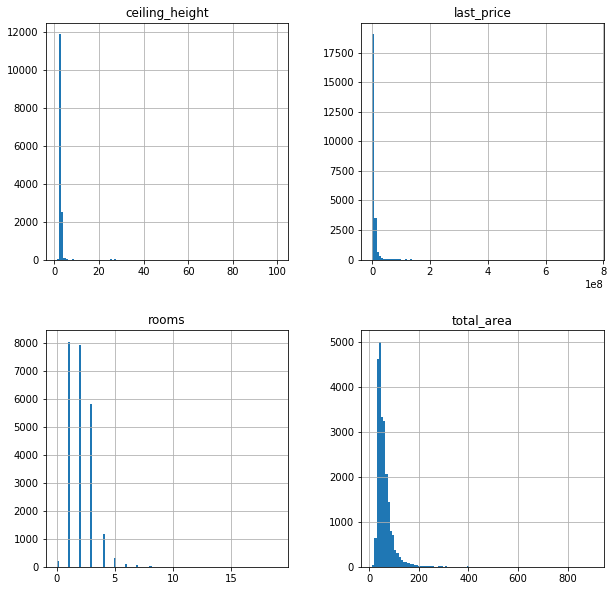

In [9]:
new_data = data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
new_data.hist(bins=100, figsize=(10,10))

Видим, что на первой и второй гистограммах есть множество значений, приближенных к нулю. Это могут быть ошибочные данные.

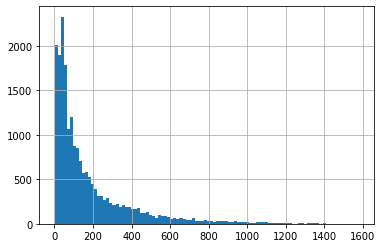

In [10]:
data['days_exposition'].hist(bins=100)

Видим яркий всплеск данных около между 0 и 200 днями, значит, в серднем, большинство квартир продаётся в течение первых 7 месяцев. 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f494131d850>,
      dtype=object)

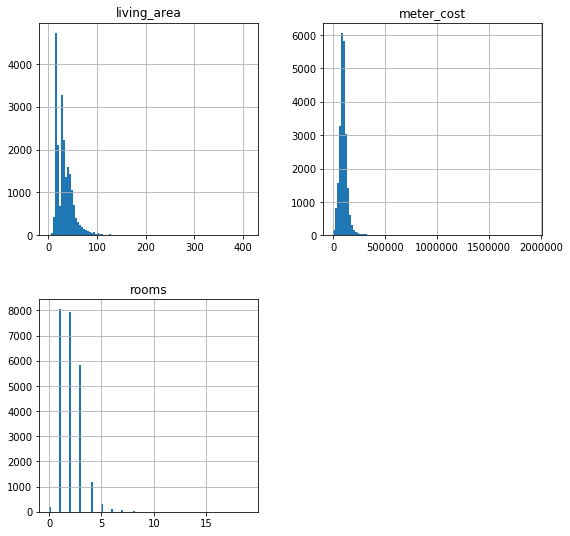

In [11]:
print(data['days_exposition'].describe())

data[['meter_cost', 'rooms', 'living_area']].hist(bins=100, figsize=(9,9))

Видим, что среднее - 180 дней, а медиана - 95, значит, в данных есть сильные выбросы. В среднем, продажа занимает около 3 месяцев, поэтому необычно быстро проходят продажи, которые проходят за 1-2 месяца, а необычно долгие продажи - более 2-3 лет.

In [12]:
#уберем выбивающиеся значения, которые могут дать отклонение
good_data = data.query('(days_exposition < 800) & (rooms>0)')

print(len(good_data))

19744


Видим, что количество квартир уменьшилось, но не сильно, но это значит, что большие данные не будут влиять на значения и "портить" картину.

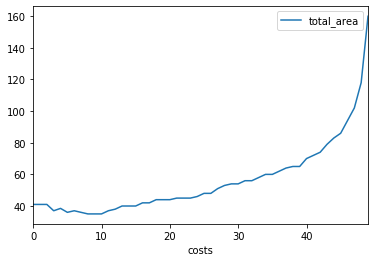

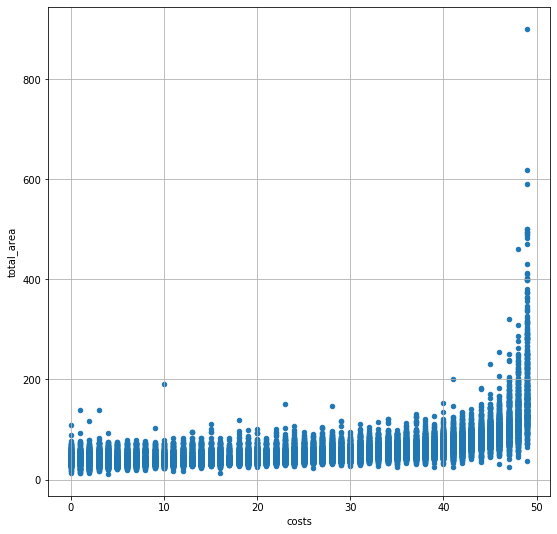

In [13]:
import warnings
warnings.filterwarnings("ignore")
#зависимоть стоимости от нескольких факторов
good_data['costs'] = pd.qcut(good_data['last_price'],50,labels=False)
good_data.pivot_table(index='costs', values='total_area', aggfunc='median').plot(kind='line')
plt.show()
good_data.plot(x='costs', y='total_area', kind='scatter', figsize=(9,9), grid=True)

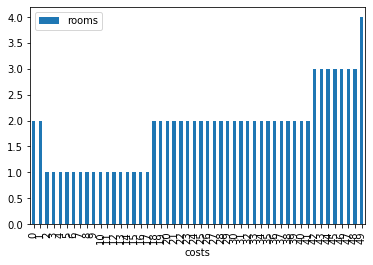

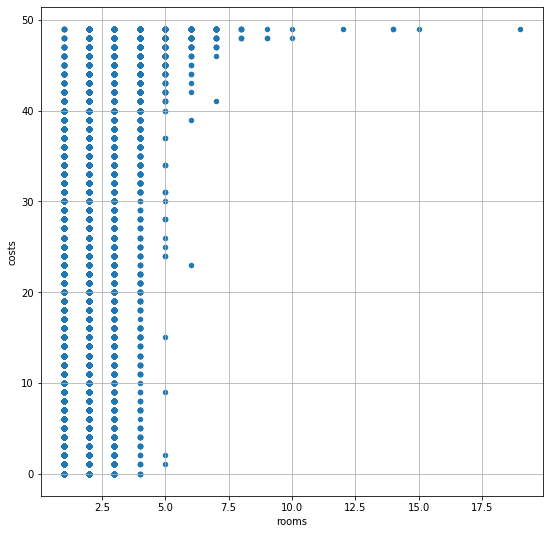

In [14]:
good_data.pivot_table(index='costs', values='rooms', aggfunc='median').plot(kind='bar')
plt.show()
good_data.plot(x='rooms', y='costs', kind='scatter', figsize=(9,9), grid=True)

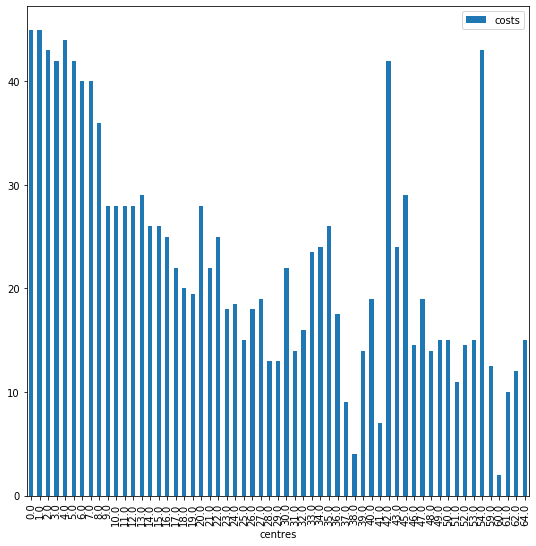

In [15]:
good_data['centres'] = (good_data['cityCenters_nearest']/1000).dropna().astype('int')

good_data.pivot_table(index='centres', values='costs', aggfunc='median').plot(kind='bar', figsize=(9,9))

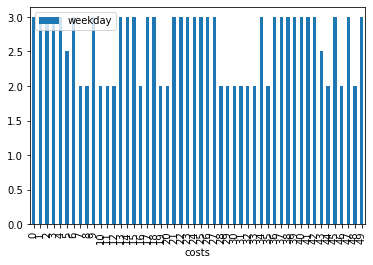

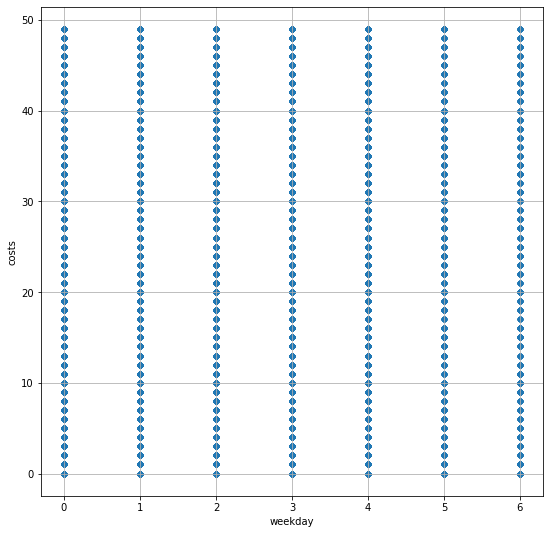

In [16]:
good_data.pivot_table(index='costs', values='weekday', aggfunc='median').plot(kind='bar')
plt.show()
good_data.plot(x='weekday', y='costs', kind='scatter', figsize=(9,9), grid=True)

Можем заметить, что чем ближе квартира к центру, тем выше ее стоимость,в среднем количество комнат не сильно влияет на стоимость, а вот общая площадь как раз сильно завышает цену, а день недели совершенно не влияет на стоимость.

In [17]:
print(data['locality_name'].value_counts().count())
#имеем 323 населенных пункта

323


In [18]:
#выберем первые 10 из них
locality = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
print(locality)

locality_name
санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64


In [19]:
#средняя цена кв.м по районам
data1 = good_data.pivot_table(index='locality_name', values='meter_cost').sort_values(by='meter_cost')
print(data1)

                    meter_cost
locality_name                 
старополье        11238.372093
станции свирь     11481.481481
вахнова кара      11842.105263
выскатка          12335.480902
совхозный         12629.129129
...                        ...
сестрорецк       102141.576686
пушкин           102420.777662
зеленогорск      111695.166699
санкт-петербург  112476.047524
лисий нос        114316.860465

[290 rows x 1 columns]


Видим, что самая большая стоимость метра в Лисьем Носу, а самая низкая - в Выборге.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4985a315d0>,
      dtype=object)

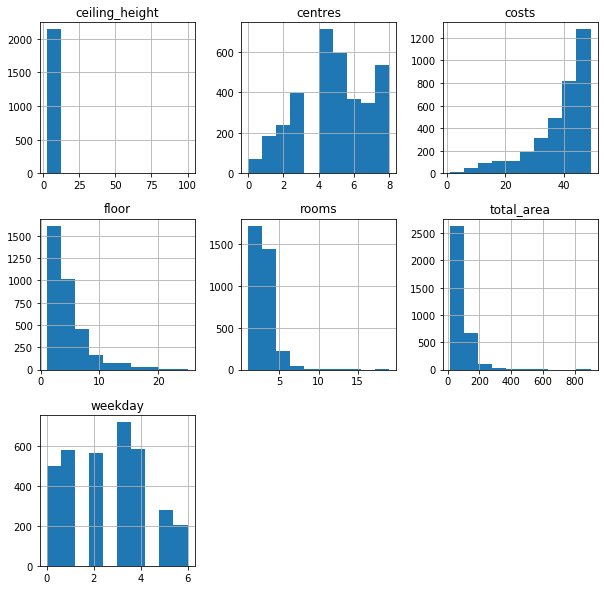

In [28]:
#нашли центр
data2 = good_data.query('(locality_name == "санкт-петербург") & (centres < 9)')
data2[['total_area', 'costs', 'rooms', 'ceiling_height','centres','floor','weekday']].hist(figsize=(10,10))


In [39]:
print(data2['living_area'].corr(data2['costs']))
print(data2['rooms'].corr(data2['costs']))
print(data2['ceiling_height'].corr(data2['costs']))
print(data2['centres'].corr(data2['costs']))
print(data2['floor'].corr(data2['costs']))

0.5168139965188263
0.5050583214510955
0.05804615076959309
-0.2607289507373054
0.1462804927542757


Можно заметить, что наибольшее влияние на стоимость квартиры имеют площадь и количество комнат, в то время как расстояние до центра совершенно не влияет на стоимость.

In [37]:
#найдем корреляцию по всему городу
data3 = good_data.query('locality_name=="санкт-петербург"')

In [38]:
#корреляция
print(data3['last_price'].corr(data3['living_area']))
print(data3['last_price'].corr(data3['rooms']))
print(data3['last_price'].corr(data3['ceiling_height']))
print(data3['last_price'].corr(data3['centres']))
print(data3['last_price'].corr(data3['floor']))

0.5565252438469058
0.3633190258884532
0.07832651749587119
-0.2380310867162484
0.007940972651750063


Видим, что на стоимость одинаково сильно как в центре, так и не в центре, влияет площадь, и не вляиет расстояние до центра. Зависимость стоимости от количества комнат в центре сильнее, чем не в центре.

## Общий вывод

Из проведенного анализа видно, что на стоимость квартиры сильно влияет удаленность от центра (особенно в г.Санкт-Петербурге), количество квадратных метров, а квартиры в среднем продаются в течение года после публикации объявления.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод